                                #PROJECT

            ATTENDENCE RATE AND ITS INFLUENCE IN FINAL GRADE

Project made with collaboration of 4 team members consisting 
1.Nirajan Subedi (teamleader)
2. sadip tamang(Coder)
3.Pratik Neupane(Tester)
4.Umang Manandhar (Documenter)

 Created a pseudo dataset 

In [274]:
#attendence rate and its influence in final grade
#day 1 - making a pseudo dataset
import numpy as np
import pandas as pd


# Define parameters
num_students = 400
attendance_min, attendance_max = 0, 100


# Generate attendance rates
attendance_rate = np.random.uniform(attendance_min, attendance_max, num_students)

# We generate a probability factor to distinguish 
probability_high_achiever = (attendance_rate - attendance_min)/ (attendance_max - attendance_min)
is_high_achiever = np.random.rand(num_students) < probability_high_achiever

#we added a noise factor here to make the relationship less direct
noise_factor = np.random.normal(loc=0, scale=5, size=num_students)

# Assign final grades based on classification
final_grade = np.where(is_high_achiever,
                       np.random.uniform(80, 100, num_students)-noise_factor,
                       np.random.uniform(25, 80, num_students)+noise_factor)

# Create DataFrame
data = pd.DataFrame({
    'Attendance Rate': attendance_rate,
    'Final Grade': final_grade
})


data.head(50)


,Attendance Rate,Final Grade
0,35.607644,45.283145
1,58.786527,97.791425
2,11.532868,66.154195
3,7.621065,62.259946
4,70.051476,87.803391
5,99.587532,93.421287
6,8.379438,46.720350
7,47.786038,49.978469
8,52.460034,104.643804
9,60.315969,68.611369


Now, as we have a dataset that we need, we wil start to analyze the data.
Here's a step-by-step approach to build a classification model to categorize students into "high achievers" and "struggling students" based on their attendance and final grade.
Steps:
1.Load and Inspect Data
2.Data Cleaning
3.categorizing data
4.Model Building
5.Evaluation
6.Visualization

1. Load and inspect Data
->  first, we will load the data and inspect it:


In [275]:


# Inspect the data
print(data.head())
print(data.info())


   Attendance Rate  Final Grade
0        35.607644    45.283145
1        58.786527    97.791425
2        11.532868    66.154195
3         7.621065    62.259946
4        70.051476    87.803391
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attendance Rate  400 non-null    float64
 1   Final Grade      400 non-null    float64
dtypes: float64(2)
memory usage: 6.4 KB
None


2.DATA Cleaning
->   We'll handle any missing values and outliers. For this dataset, it looks clean, but we'll ensure there are no missing values.


In [276]:
data.isna().any()


Attendance Rate    False
Final Grade        False
dtype: bool

3.Categorizing the Data
->  We'll categorize students into "high achievers" and "struggling students" based on their final grades. Let's assume a threshold of 80 for classification.


In [277]:
high_achievers_threshold = 80  # Threshold for classification
data['Category'] = data['Final Grade'].apply(lambda x: 'High Achiever' if x >= high_achievers_threshold else 'Struggling Student')


print(data.head())

   Attendance Rate  Final Grade            Category
0        35.607644    45.283145  Struggling Student
1        58.786527    97.791425       High Achiever
2        11.532868    66.154195  Struggling Student
3         7.621065    62.259946  Struggling Student
4        70.051476    87.803391       High Achiever


4.Model Building
->  We'll use a classification model to analyze how attendance rates influences the students outcomes. For easiness, we'll use a logistic regression model.


In [278]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Features and target variable
X = data[['Attendance Rate']]
y = data['Category']
grades=data['Final Grade']

# Encoding target variables here
y = y.map({'High Achiever': 1, 'Struggling Student': 0})

# Train ,test split
X_train, X_test, y_train, y_test,grades_train,grades_test = train_test_split(X, y,grades, test_size=0.3, random_state=42)

# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = model.score(X_test_scaled, y_test)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


              precision    recall  f1-score   support

           0       0.79      0.73      0.76        66
           1       0.69      0.76      0.73        54

    accuracy                           0.74       120
   macro avg       0.74      0.74      0.74       120
weighted avg       0.75      0.74      0.74       120


Model Accuracy: 74.17%


Confusion Matrix:


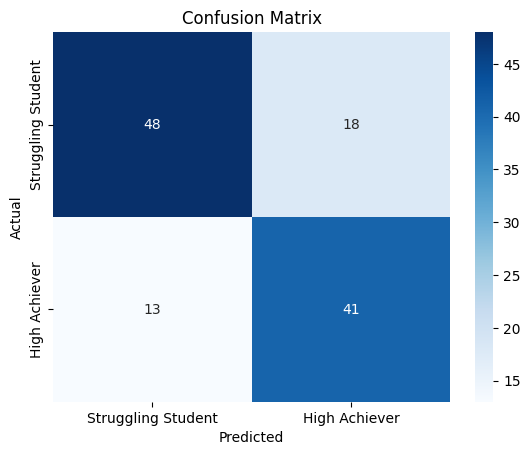

In [279]:
import seaborn as sns
import  matplotlib.pyplot as plt
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Struggling Student', 'High Achiever'], yticklabels=['Struggling Student', 'High Achiever'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [280]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Struggling Student', 'High Achiever']))

Classification Report:
                    precision    recall  f1-score   support

Struggling Student       0.79      0.73      0.76        66
     High Achiever       0.69      0.76      0.73        54

          accuracy                           0.74       120
         macro avg       0.74      0.74      0.74       120
      weighted avg       0.75      0.74      0.74       120



5.Visualization
-> Now, lets visualize the results to identify the patterns in our result.
firstly, we will try scatterplot:


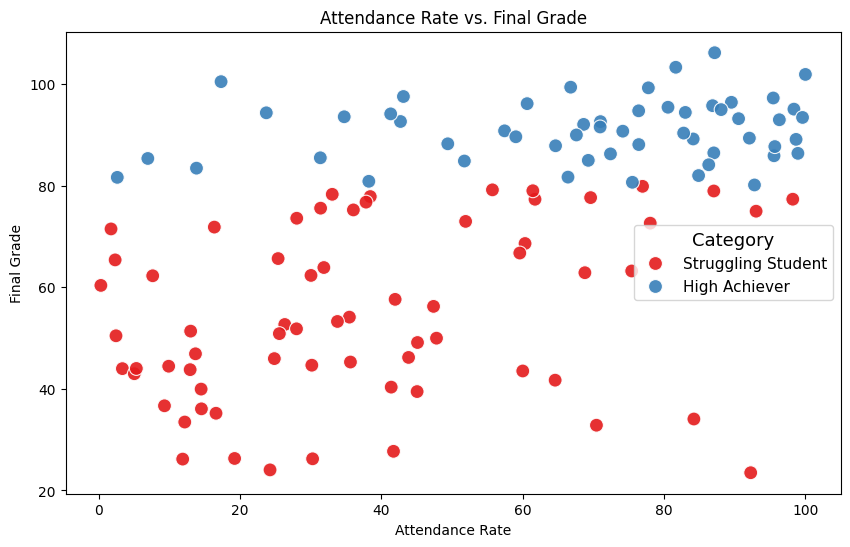

In [283]:

category_labels = {0: 'Struggling Student', 1: 'High Achiever'}

plt.figure(figsize=(10, 6))

scatter_plot = sns.scatterplot(x=X_test['Attendance Rate'], y=grades_test, hue=y_test, palette='Set1', s=100, alpha=0.9, marker='o')

plt.title('Attendance Rate vs. Final Grade')
plt.xlabel('Attendance Rate')
plt.ylabel('Final Grade')


handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=[category_labels[int(label)] for label in labels], title='Category', title_fontsize='13', fontsize='11')

plt.show()



By watching the scatter plot, we can say that high achieving students(blue dots)have higher attendence rates which resulted in higher final grades. whereas, struggling student(orange dots) have low attendence rates which resulted in their lower final grades.


Now, secondy we will try histogram as we cannot give accurate answer by just seeing the scatterplot
2.Histogram:
A histogram can show the distribution of attendance rates and final grades separately for high achievers and struggling students.



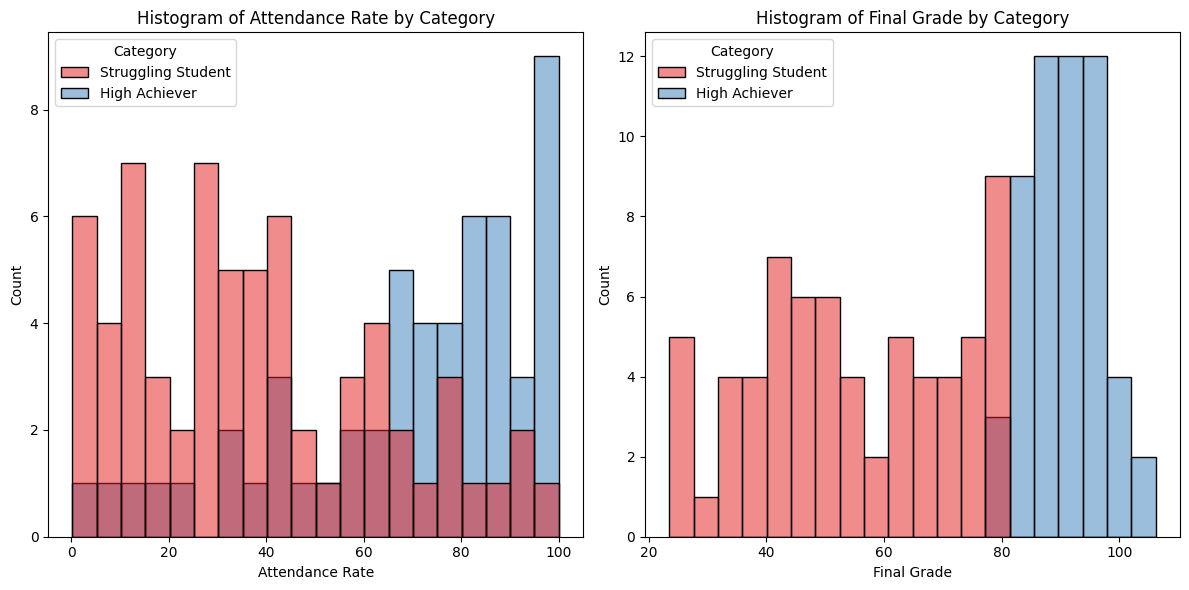

In [285]:


test_data = X_test.copy()
test_data['Grade'] = grades_test.values
test_data['Category'] = y_test.map({0: 'Struggling Student', 1: 'High Achiever'})  # Map the encoded category back to original labels

plt.figure(figsize=(12, 6))

# Histogram for Attendance Rate with hue for Category
plt.subplot(1, 2, 1)
sns.histplot(data=test_data, x='Attendance Rate', hue='Category', palette='Set1', bins=20, kde=False)
plt.title('Histogram of Attendance Rate by Category')
plt.xlabel('Attendance Rate')
plt.ylabel('Count')

# Histogram for Final Grade with hue for Category
plt.subplot(1, 2, 2)
sns.histplot(data=test_data, x='Grade', hue='Category', palette='Set1', bins=20, kde=False)
plt.title('Histogram of Final Grade by Category')
plt.xlabel('Final Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


we can see the differences very cleary in the attendence of high achievers and attendence of struggling students which resulted to the high achievings students got very good final grades as they were present in class more often than those of struggling students who got very low final grades coz they were not often present in the class.


Conclusion:::

Attendance and Academic Success:
High Achievers: Students categorized as high achievers tend to have higher attendance rates. This pattern suggests that a strong commitment to attending classes consistently correlates with better academic performance. The higher attendance rates among these students likely contribute to their understanding of the material and their overall success in their courses.

Struggling Students: Conversely, students identified as struggling typically exhibit lower attendance rates. This lower attendance could be a contributing factor to their lower final grades. It is plausible that missed classes result in gaps in learning, which impacts their ability to perform well academically.


Distribution of Grades:
High Achievers: The final grades for high achievers are generally higher. This outcome aligns with the trend of having a better understanding of course content, which is likely facilitated by regular class attendance and engagement.

Struggling Students: Struggling students show lower final grades, reflecting their challenges in mastering the course material. The lower attendance rates among these students may exacerbate their difficulties, further impacting their academic performance.

Visual Analysis of Attendance and Academic Performance
Scatter Plot Insights:
 positive corelation: The scatter plot demonstrates a positive correlation between attendance rates and final grades. Students with higher attendance rates generally tend to achieve higher final grades. This indicates that consistent attendance is associated with better academic performance.
Trend Observation: The scatter plot shows a general upward trend, where as the attendance rate increases, the final grade also tends to increase. This visual representation reinforces the idea that regular attendance is beneficial for academic success.


Histogram Insights:

Distribution of Attendance Rates: The histogram of attendance rates shows that high achievers (students with higher final grades) are more likely to have higher attendance rates. There is a noticeable concentration of higher attendance rates among students with the top final grades.

Distribution of Final Grades: Conversely, the histogram of final grades reveals that struggling students (those with lower final grades) tend to have lower attendance rates. The concentration of lower final grades aligns with lower attendance rates, indicating that students who attend less frequently are more likely to have poorer academic outcomes.


Patterns Identified:

High Achievers: Students categorized as high achievers are predominantly in the higher range of attendance rates and final grades. This pattern supports the hypothesis that frequent class attendance contributes to better understanding and performance.

Struggling Students: Students who struggle academically tend to have lower attendance rates and lower final grades. This pattern suggests that lower attendance is a key factor contributing to their academic challenges.


Visual Summary:

Scatter Plot Summary: The scatter plot provides a clear visual representation of the positive relationship between attendance and final grades, illustrating how higher attendance correlates with better performance.

Histogram Summary: The histograms further highlight that high grades are associated with high attendance and low grades with low attendance. This reinforces the idea that consistent attendance is linked to academic success.


Implications
Intervention Strategies: The observed correlation suggests that improving student attendance could be an effective strategy for enhancing academic performance. Educational institutions might consider implementing programs or policies to encourage regular attendance.

Support for Struggling Students: For students with low attendance rates, additional support and resources might be needed to address the underlying issues and improve their engagement with the course material.


Future Work
Further Analysis: To deepen the understanding of the relationship between attendance and academic performance, additional analyses could explore other factors influencing grades, such as participation, study habits, and external support systems.


Broader Data Collection: Gathering more data, including qualitative aspects such as student engagement and challenges, could provide a more comprehensive view of the factors affecting academic success.


                            -project by Nirajan Subedi( Team Leader)
                                        -sadip tamang (Coder)
                                        -Pratik Neupane (Tester)
                                        -Umang Manandhar (Documenter)